<a href="https://colab.research.google.com/github/mkandrewhuang301/CS362/blob/main/hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> **Student Names and IDs**:
>
> Andrew Huang ah629
> Jason Shang zs110


Student Names and IDs:

Student 1, ID1 (Replace this item with your first and last name and student ID number. Add more items like this as needed, including the > - characters at the beginning, which generate the indent and the bullet.)
All homework is to be submitted through Gradescope. For each submission, you will submit both a PDF file and a Jupyter notebook. We will usually grade your PDF file only (typically we will NOT run your code, so make sure you have all the results are displayed correctly) and the Jupyter notebook is for backup purpose (if we see something wrong in your code).

Homework is to be done either individually or in pairs, and **working in pairs is strongly encouraged**: This helps you discuss concepts and get unstuck when you encounter difficulties. It also helps us return your graded work earlier, since we'll have to read fewer assignments. **No other groupings are allowed**.

# Homework 2

## Part 1: Theory

### 1.1
Let $\delta(t)$ be the dirac delta impulse function. $f(t)$ is continuous in $[-\infty, \infty]$, evaluate $\int_{-\infty}^{\infty}f(t)\delta(t-a)dt$

### Answer:
$f(a)$

### 1.2
For $f(t) = sin(2\pi f_0 t)$, what is its continuous Fourier transform $F(f)$? **Hint**: rewrite $sin(-)$ using Euler's formula.

### Answer
using Euler's formula:
$ f(t) = sin(2\pi f_0 t) = \frac{1}{2} (e^{2\pi if_0t}  - e^{-2\pi if_0t})$

$F(t) = \int_{-\infty}^{\infty} \frac{1}{2} (e^{2\pi if_0t}  - e^{-2\pi if_0t})* e^{2\pi ift} dt$

 = $\frac{1}{2}\int_{-\infty}^{\infty} (e^{2\pi if_0t}* e^{2\pi ift}) dt   - \frac{1}{2}\int_{-\infty}^{\infty}(e^{-2\pi if_0t}* e^{2\pi ift}) dt$

 = $\frac{1}{2}\int_{-\infty}^{\infty} (e^{2\pi i(f + f_0)t}) dt   - \frac{1}{2}\int_{-\infty}^{\infty}(e^{-2\pi i(f+ f_0)t}) dt$





### 1.3
If we are sampling a 100Hz sinusoidal signal (i.e., $f_0=1/100$), what is its Nyquist rate in samples per second? **Note**: Hz is a commonly used unit in signal processing - Hertz, it stands for cycles per second.

### Answer
Nyquist Rate = 2* Highest Frequency = 2*100 = 200 samples per second

### 1.4


The continuous 1-dimensional time signal $x(t)$ is sampled every $\Delta T$ seconds to obtain the discrete time signal $x_n$. The Discrete Fourier Transform (DFT) is computed over a sample window of M samples. Write the expression for the DFT $X_k$ for $x_n$. Then, set $k=0$, what is $X_{k=0}$?

### Answer


1.   DFT X(k)=

$ \sum_{n = 0}^{m-1} x_n  e^{2\pi ik\frac{n}{M}}$
2.   X(0) =

When k = 0, we subsitute 0 for k in the equation.
we get $ \sum_{n = 0}^{m-1} x_n  e^{2\pi i(0)\frac{n}{M}}$ = $\sum_{n = 0}^{m-1} x_n  e^0$

= $\sum_{n = 0}^{m-1} x_n$



## Part 2: Coding

### Sampling theory

### 2.1
Consider sampling the following sinusoidal function:
$$
x(t) = sin(2\pi f_ot)
$$
Let $f_o = 100Hz$. We have calculated the Nyquist rate for this signal in **1.3**. Now, write a Python program to sample this sinusoidal wave using $T=0.1$ seconds, that is, sample for a total time of 0.1 seconds.  Plot the resulting sampled values as a function of time. Will it be possible to recover the signal from these samples? Explain your answer.

#### Answer

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sinfunc(f0, deltaT):
    return np.sin(2*np.pi*f0*deltaT)

<ipython-input-3-d0eaff8bf63e>:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(deltaT, values)


Text(0.5, 1.0, 'sinusodial wave samples')

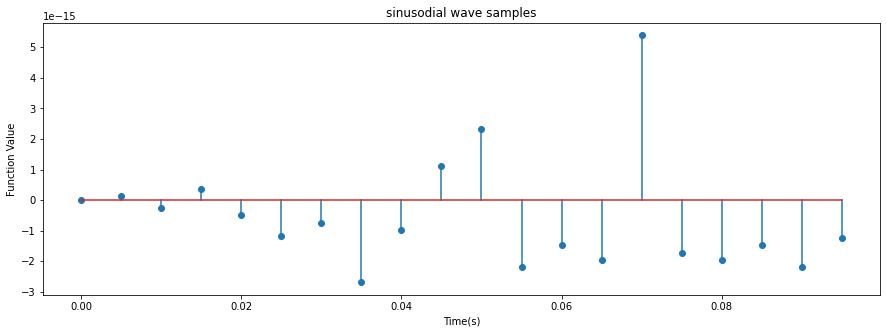

In [ ]:
f0 = 100    # frequency (in Hertz)
T = 0.1    # seconds
NR = f0*2 # nyquist rate
N = T*NR # samples

#discrete time points
deltaT = np.arange(N)*(1/NR)
values = sinfunc(f0, deltaT)

##plot it
plt.figure(figsize = (15, 5))
plt.stem(deltaT, values)
plt.xlabel("Time(s)")
plt.ylabel("Function Value")
plt.title("sinusodial wave samples")

It is not possible to recover the signal from the sample, since we're sampling AT the Nyquist rate, instead of at a sampling rate greater than the Nyquist rate.

### 2.2
Now, resample the signal in **2.1** using 400 and 4000 samples per second. Plot the two sampled signals on the same graph. Are you able to recover the signal in these cases?

#### Answer:

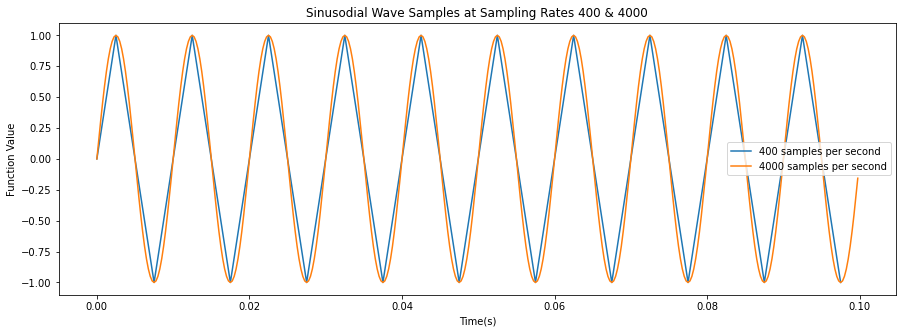

In [ ]:
sampling_rate = 400
num_samples = sampling_rate*T
deltaT400 = np.arange(num_samples)*(1/sampling_rate)

sampling_rate = 4000
num_samples = sampling_rate*T
deltaT4000 = np.arange(num_samples)*(1/sampling_rate)

plt.figure(figsize=(15, 5))
plt.plot(deltaT400, sinfunc(f0, deltaT400), label="400 samples per second")
plt.plot(deltaT4000, sinfunc(f0, deltaT4000), label = "4000 samples per second")
plt.xlabel("Time(s)")
plt.ylabel("Function Value")
plt.title("Sinusodial Wave Samples at Sampling Rates 400 & 4000")
plt.legend()

Yes, you should be able to recover the signal because the sampling rates (400 and 4000) are well above the Nyquist rate (which is $f_0*2=200 Hz$)

### 2.3
Now, in order to verify if we have sampled the signal correctly, we are going to compute the Discrete Fourier Transform (DFT) using the Fast Fourier Transform (FFT) algorithm implemented in `numpy`. As we have derived the continuous Fourier transform in **1.2**, the DFT we get should resemble the expression in **1.2** if the signal was sampled correctly. First, write code to calculate the FFT of the signal. Then, due to symmetry, you will only take half of the computed FFT coefficients. Lastly, you are going to calculate the magnitude of the DFT by taking its absolute value. Plot the results using frequency as x-axis and calculated absolute value as the y-axis. We are going to do this for the **three** signals sampled at different rates in **2.1** and **2.2**. Are you able to identify whether signals were sampled correctly or not? **Hint**: use a logarimic scale in x and y to plot the FFT coefficients.

#### Answer:

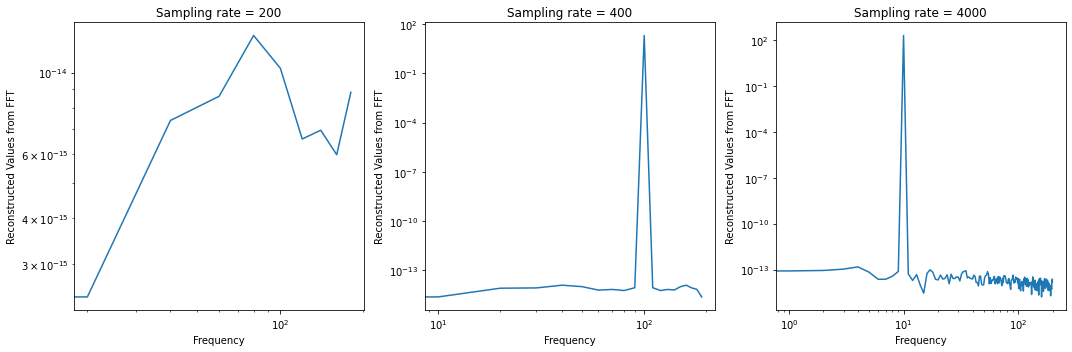

In [ ]:
plt.figure(figsize=(15,5))
T = 0.1
sampling_rates = [200, 400, 4000]
f0 = 100

for i in range(len(sampling_rates)):
    # calculate signal
    sampling_rate = sampling_rates[i]
    num_samples = sampling_rate*T
    deltaT = np.arange(num_samples)*(1/sampling_rate)
    values = sinfunc(f0, deltaT)

    # reconstruct signal with fast fourier transform
    fft = np.fft.fft(values)
    half_fft = fft[:len(fft)//2]
    dft = abs(half_fft)

    freq = np.arange(num_samples//2)*200/(num_samples//2)

    plt.subplot(1, 3, i+1)
    plt.xscale("log")
    plt.yscale("log")
    plt.plot(freq, dft)
    plt.title(f'Sampling rate = {sampling_rate}')
    plt.xlabel("Frequency")
    plt.ylabel("Reconstructed Values from FFT")
    plt.tight_layout()

Yes, we are able to see which graphs are sampled correctly. On graph 2 and 3, we see that the reconstructed values from the FFT show that the peaks are 100, which is similar to the initial conditions. This means that no information was lost. In Graph 1, the peaks are not at 100, meaning that information was lost. This is expected because we did not sample above the nyquist rate for it

Now, we are going to investigate how we can use the 2D FFT in image processing. Let's load an image from skimage.

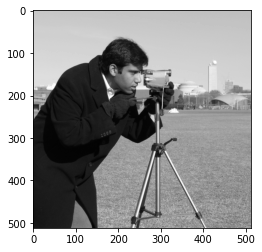

In [ ]:
from skimage import data
from matplotlib import pyplot as plt
%matplotlib inline
img = data.camera()
plt.imshow(img, cmap='gray')
plt.style.use('grayscale')
plt.show()


### 2.4
Write code to calculate the 2D FFT of the camera man image. Is the $F(0,0)$ value in the FFT matrix real of imaginary? What does it represent?

#### Answer:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#create fast fourier transform of image
fft2 = np.fft.fft2(img)
fft2[0][0]

(33832495+0j)

2D transform formula is
$F(u,v) = \int \int f(x,y)e^{-i 2 \pi (\frac{ux}{m} +\frac{vy}{m})}dx dy$. U and V are frequency in X and Y directions

Fast Fourier Transform F(0,0) means amplitude and phase is zero.  can be represented as
$F(0,0)=
\int \int f(x,y)e^{-i 2 \pi (\frac{0x}{m} +\frac{0y}{m})}dx dy = \int \int f(x,y)e^0 dxdy = \int \int f(x,y)dxdy$ = the total pixel values across the entire grid. Since f(x,y) have no complex numbers, the double integral across the entire image is also real.


### 2.5
Now, center the FFT matrix using `np.fft.fftshift` which centers the transform by pre-multiplying the image by $(-1)^{(x+y)}$.
Calculate its log frequency spectrum and phase spectrum. Plot them using log10 scaling.


**Note**: Recall that the Fourier transform $X(\omega)$ is a complex valued function of $\omega$. Therefore, $X(\omega)$ can be written as:
$$
X(\omega) = X_R(\omega)+jX_I(\omega)
$$
A real part and an imaginary part.
The magnitude of $X(\omega)$ is given by:
$$
\left|X(\omega)\right|=\sqrt{(X_R(\omega))^2+(X_I(\omega))^2}
$$
and the phase of $X(\omega)$ is given by:
$$
\angle X(\omega) = tan^{-1}\frac{X_I(\omega)}{X_R(\omega)}
$$

#### Answer

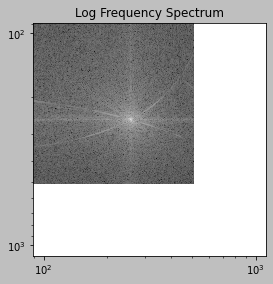

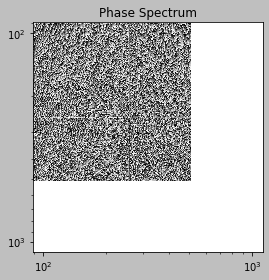

In [ ]:
fft2_shift = np.fft.fftshift(fft2)

magnitude_spectrum = np.log10(np.abs(fft2_shift))
phase_spectrum = np.angle(fft2_shift)

plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Log Frequency Spectrum')
plt.tight_layout()
plt.xscale("log")
plt.yscale("log")
plt.show()

plt.imshow(phase_spectrum, cmap='gray')
plt.xscale("log")
plt.yscale("log")
plt.title('Phase Spectrum')
plt.tight_layout()
plt.show()


### 2.6
Now we are going to apply low-pass filtering using masking in the Fourier domain. Using the centered fourier transform of the image (without rotation), apply a circular mask with radius of 30 pixels around the center of the image. Fourier coefficients inside the mask will stay the same and all other Fourier coefficients well be replaced with 0. Now we have a filtered Fourier transform. Apply the inverse DFT and show the low-pass filtered image. **Note**: you might want to use `np.fft.ifftshift` to undo the centering of the fourier transform before doing the IDFT.

#### Answer

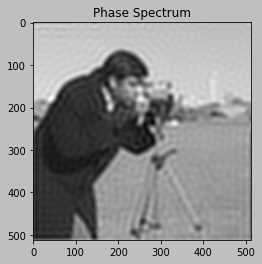

In [ ]:
radius = 30;
##get center of grid
height, width = fft2_shift.shape
mask = np.zeros_like(fft2_shift)
y,x = np.ogrid[-height//2:height//2, -width//2:width//2]
mask = x*x + y*y <= radius*radius;
fft2_shift[~mask] = 0;
fft2_unshift = np.fft.ifftshift(fft2_shift)
result = np.fft.ifft2(fft2_unshift);
result = np.real(result);
plt.imshow(result, cmap='gray')
plt.title('Phase Spectrum')
plt.show()

### Image reconstruction from projections

### 2.7
Now, you will write code to reconstruct an image from its projections. Import the `radon` and `iradon` functions from `skimage.transform`. We will use the camera man image. First, load and pad the image with zeros such that the new image is a square with sides equal to the diagonal of the original in size. Then, calculate the projections of the image at angles of 0, 45, 90, and 135 degrees using the Radon transform. Plot the projections.

#### Answer

512
724


/usr/local/lib/python3.8/dist-packages/skimage/transform/radon_transform.py:83: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


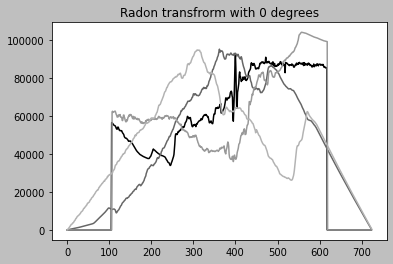

In [ ]:
from skimage.transform import radon
from skimage.transform import iradon
import math
img = data.camera()
height, width = img.shape
diagonal = int(math.sqrt(height**2 + width**2))
print(height)
print(diagonal)
padded_img = np.zeros((diagonal, diagonal))
x_offset = int((diagonal - width) / 2)
y_offset = int((diagonal - height) / 2)
padded_img[y_offset:y_offset+height, x_offset:x_offset+width] = img

##projection of image
theta = [0,45,90,135]
sinogram = radon(padded_img, theta=theta)

plt.title('Radon transfrorm with 4 different degrees')
plt.plot(sinogram);


Now, calculate projections from 0 to 180 degrees (in 1 degree increments) and plot them. Then, reconstruct the image using these projections. Once you get the reconstruted image, make sure to unpad it to its original size. Show the reconstructed image. Then, plot the difference between reconstructed image and the original image.

#### Answer

/usr/local/lib/python3.8/dist-packages/skimage/transform/radon_transform.py:83: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


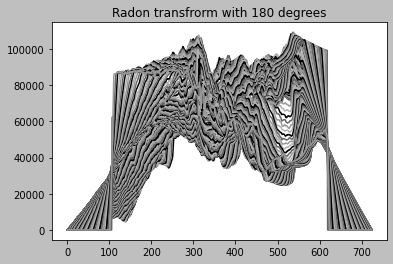

In [ ]:
theta = list(range(1,180))
sinogram = radon(padded_img, theta=theta)
plt.title('Radon transfrorm with 180 degrees')
plt.plot(sinogram);

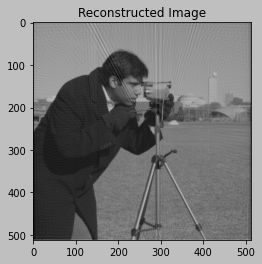

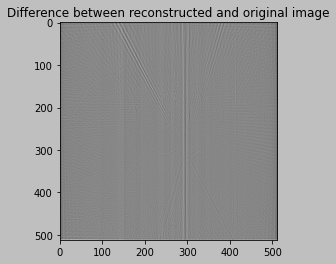

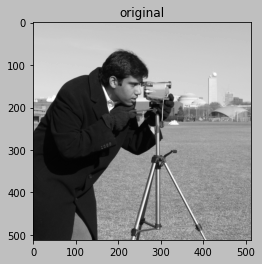

In [ ]:
reconstruction_img = iradon(sinogram, theta=theta)
reconstruction_img_unpadded = reconstruction_img[y_offset:y_offset+height, x_offset:x_offset+width]
plt.imshow(reconstruction_img_unpadded, cmap='gray')
plt.title('Reconstructed Image')
plt.show()
difference_img = reconstruction_img_unpadded - img
plt.imshow(difference_img, cmap='gray')
plt.title('Difference between reconstructed and original image')
plt.show()
plt.imshow(img, cmap='gray')
plt.title('original')
plt.show()